There are two ways to proceed: oversampling or undersampling.
First let's start with over-sampling, I will use SMOTE method.

First I need to divide the dataset into training and testing.

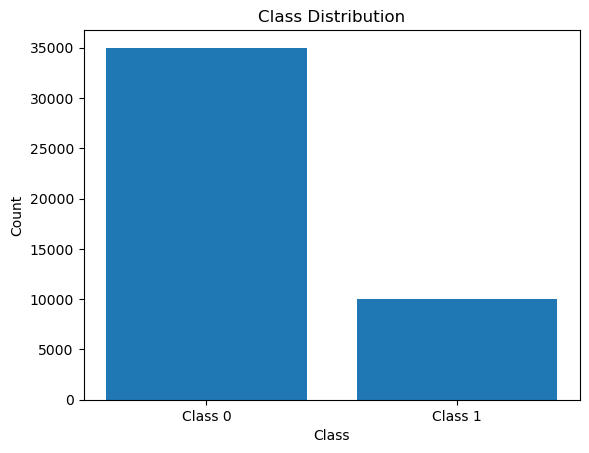

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/loan_data_all_numerical_no_outliers.csv')

x = df.drop(["loan_status"], axis=1)
y = df["loan_status"]
count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()


In [48]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)


Distribution of test set:

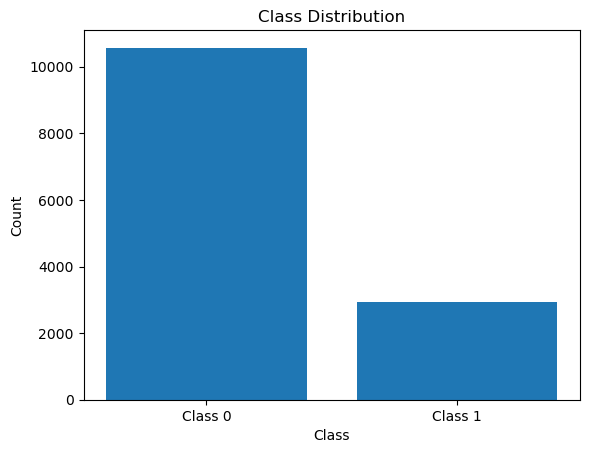

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
count,13498.000000,13498.000000,13498.000000,1.349800e+04,13498.000000,13498.000000,13498.000000,13498.000000,13498.000000,13498.000000,13498.000000,13498.000000
mean,27.740628,0.447770,1.712105,8.065669e+04,0.903986,9610.409542,2.323974,10.961955,0.139253,632.431101,0.514372,0.216995
std,5.929689,0.497283,1.064604,6.414597e+04,0.966106,6293.655381,1.680801,2.984379,0.087090,50.410262,0.499812,0.412215
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.000000,5.420000,0.000000,419.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,4.763200e+04,0.000000,5000.000000,1.000000,8.490000,0.070000,601.000000,0.000000,0.000000
50%,26.000000,0.000000,2.000000,6.721900e+04,0.000000,8000.000000,2.000000,11.010000,0.120000,639.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.689400e+04,2.000000,12250.000000,4.000000,12.980000,0.190000,669.000000,1.000000,0.000000
max,76.000000,1.000000,4.000000,2.280980e+06,3.000000,35000.000000,5.000000,20.000000,0.560000,784.000000,1.000000,1.000000


In [49]:
x_test = df_test.drop(["loan_status"], axis=1)
y_test = df_test["loan_status"]

count_class = y_test.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

df_test = df_test.drop(df_test.columns[0], axis=1)
df_test.to_csv("data/test_set.csv", index=False)
df_test.describe()

But the distribution of training set can't look like this, let's use SMOTE.

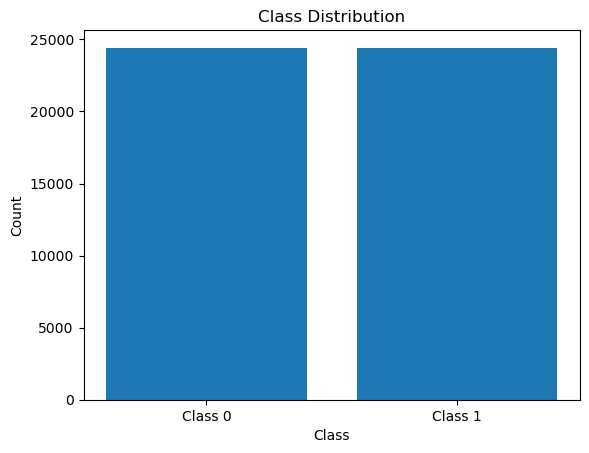

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
0,21.0,0,1,24999.0,0,2000.0,2,11.01,0.08,527,1,0
1,24.0,1,2,99084.0,3,14700.0,0,9.63,0.15,662,0,0
2,24.0,1,1,121015.0,2,10000.0,4,12.87,0.08,681,1,0
3,25.0,0,2,49347.0,0,7200.0,1,9.88,0.15,628,1,0
4,22.0,1,3,81181.0,2,4000.0,3,6.76,0.05,503,1,0


In [50]:
from imblearn.over_sampling import SMOTE

x_train = df_train.drop(["loan_status"], axis=1)
y_train = df_train["loan_status"]

# Initialize SMOTE
smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train, y_train)

count_class = y_train.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()
x_train = x_train.drop(x_train.columns[0], axis=1)
y_train = pd.Series(y_train, name="loan_status")

# Merge x and y for train set
df_train = pd.concat([x_train, y_train], axis=1)

df_train.head()

Saving train set to csv

In [ ]:
df_train.to_csv("data/train_set.csv", index=False)

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
count,48844.000000,48844.000000,48844.000000,4.884400e+04,48844.000000,48844.000000,48844.000000,48844.000000,48844.000000,48844.000000,48844.000000,48844.000000
mean,27.645873,0.360536,1.593174,7.266803e+04,0.707088,10011.200882,2.264925,11.663858,0.161544,632.027455,0.325772,0.500000
std,5.719493,0.480161,1.010874,5.772339e+04,0.918592,6591.331213,1.591762,2.972481,0.097953,47.319020,0.468667,0.500005
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.000000,5.420000,0.000000,390.000000,0.000000,0.000000
25%,23.716539,0.000000,1.000000,4.184400e+04,0.000000,5000.000000,1.000000,9.790000,0.080000,603.000000,0.000000,0.000000
50%,26.000000,0.000000,2.000000,6.105800e+04,0.000000,8410.446288,2.000000,11.490000,0.140000,638.000000,0.000000,0.500000
75%,30.000000,1.000000,2.000000,8.759600e+04,2.000000,14000.000000,3.000000,13.804361,0.230000,666.000000,1.000000,1.000000
max,80.000000,1.000000,4.000000,2.448661e+06,3.000000,35000.000000,5.000000,20.000000,0.660000,772.000000,1.000000,1.000000


Saving all set to csv

In [ ]:
df = pd.concat([df_test, df_train], axis=0)
df.to_csv("data/ready_set.csv", index=False)

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
3880,22.0,1,0,40106.0,0,4000.0,3,11.01,0.10,722,0,1
22944,30.0,1,3,72835.0,2,8000.0,3,7.51,0.11,631,0,0
282,23.0,0,1,19062.0,1,4000.0,5,13.98,0.21,667,0,1
44948,30.0,0,2,46101.0,0,12000.0,1,12.14,0.26,711,0,1
15244,26.0,0,2,152348.0,2,11000.0,0,7.14,0.07,618,1,0
